# Addis Ababa University Institute of Technology
School of Information Science and Engineering
Artificial Intelligence Graduate Program

Artificial Intelligence: Principles and Techniques

Name: Mohammednur Ebrahim
Id :  GSE/8650/15

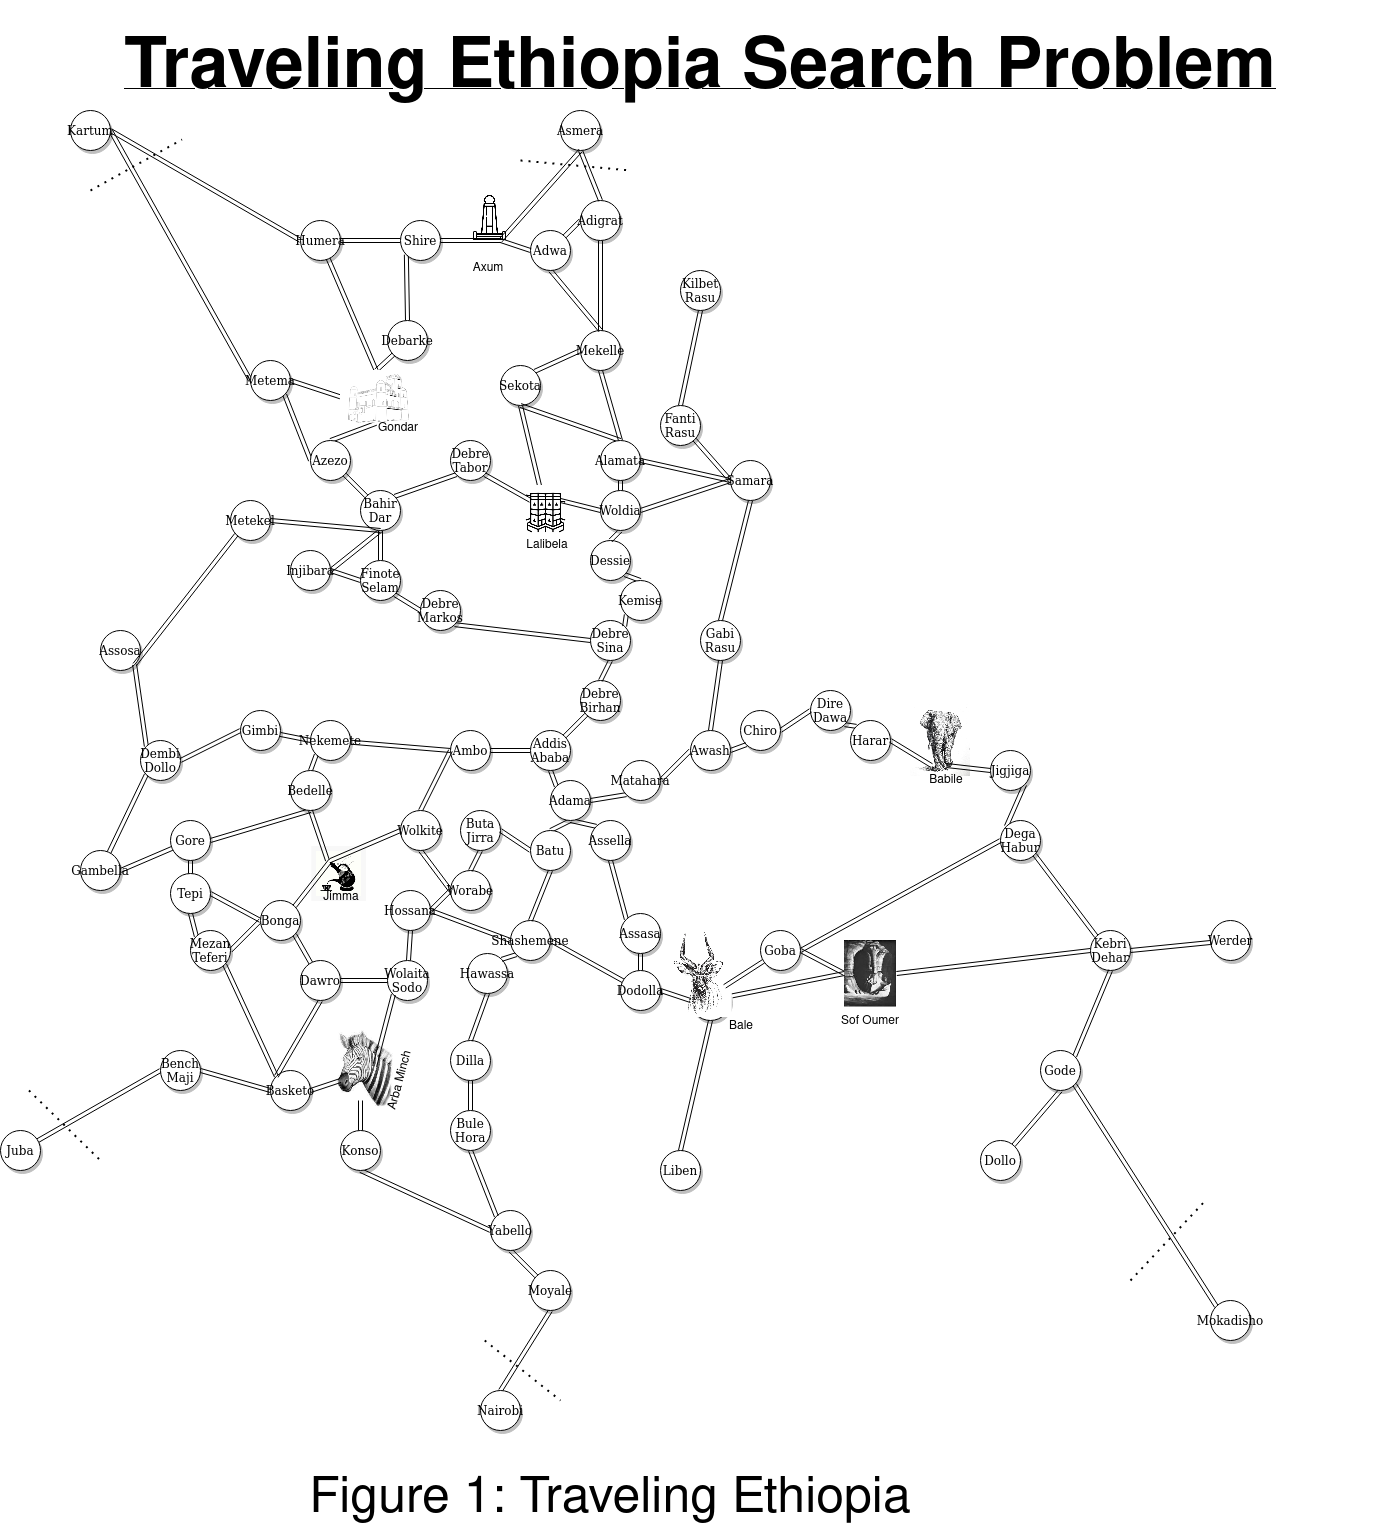

# 1. Consider Figure 1 (A generic state space graph for traveling Ethiopia search problem) to solve
the following problems.
1.1 Convert Figure 1, a State space graph for traveling Ethiopia search problem, into some
sort of manageable data structure such as, stack or queue.


In [1]:
from collections import deque
infinity = float('inf')

class Graph:
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed

    def nodes(self):
        return list(self.graph_dict.keys())

    def get(self, a, b=None):
        links = self.graph_dict.get(a)
        if b is None:
            return links

class Problem:
    def __init__(self, initial, goal=None):
        self.initial = initial
        self.goal = goal

    def goal_test(self, state):
        return state == self.goal

    def actions(self, state):
        raise NotImplementedError

    def result(self, state, action):
        raise NotImplementedError

    def value(self, state):
        raise NotImplementedError


class GraphProblem(Problem):
    def __init__(self, initial, goal, graph):
        Problem.__init__(self, initial, goal)
        self.graph = graph

    def actions(self, node):
        return self.graph.get(node)

    def result(self, state, action):
        return action
  
class Node:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = 0

        if parent:
            self.depth = parent.depth + 1
    
    def __repr__(self):
        return f"<Node {self.state}>"
    
    def expand(self, problem):
        children = []
        for action in problem.actions(self.state):
            child_node = self.child_node(problem, action)
            children.append(child_node)
        return children
    
    def child_node(self, problem, action):
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action)
        return next_node
    
    def path(self):
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))
    
    def solution(self):
        return [node.state for node in self.path()]


In [2]:
visit_ethiopia= Graph(dict( {'Addis Ababa': {'Adama', 'Ambo', 'Debre Berhan'},
            'Adama': {'Matahara', 'Asella', 'Batu', 'Addis Ababa'}, 
            'Ambo': {'Wolkite', 'Addis Ababa', 'Nekemte'}, 
            'Debre Berhan': {'Addis Ababa', 'Debre Sina'}, 
            'Matahara': {'Adama', 'Awash'}, 
            'Asella': {'Adama', 'Assasa'}, 
            'Batu': {'Adama', 'Buta Jirra', 'Shashamene'}, 
            'Wolkite': {'Ambo', 'Worabe', 'Jimma'}, 
            'Nekemte': {'Ambo', 'Bedelle', 'Gimbi'}, 
            'Debre Sina': {'Debre Berhan', 'Kemise', 'Debre Markos'}, 
            'Awash': {'Chiro', 'Gobi Rasu', 'Matahara'}, 
            'Assasa': {'Asella', 'Dodolla'}, 
            'Buta Jirra': {'Batu', 'Worabe'}, 
            'Shashamene': {'Batu', 'Hawassa', 'Dodolla', 'Hossana'}, 
            'Worabe': {'Wolkite', 'Hossana', 'Buta Jirra'}, 
            'Jimma': {'Wolkite', 'Bonga', 'Bedelle'}, 
            'Bedelle': {'Nekemte', 'Gore', 'Jimma'}, 
            'Gimbi': {'Nekemte', 'Dambidollo'}, 
            'Kemise': {'Debre Sina', 'Dessie'}, 
            'Debre Markos': {'Debre Sina', 'Finote Selam'},
            'Chiro': {'Awash', 'Dire Dawa'}, 
            'Gobi Rasu': {'Awash', 'Samara'}, 
            'Dodolla': {'Assasa', 'Shashamene', 'Bale'}, 
            'Hawassa': {'Shashamene', 'Dilla'}, 
            'Hossana': {'Shashamene', 'Worabe', 'Wolaita Sodo'}, 
            'Bonga': {'Jimma', 'Dawro', 'Tepi', 'Mizan Teferi'}, 
            'Gore': {'Tepi', 'Gambella', 'Bedelle'}, 
            'Dambidollo': {'Gimbi', 'Assosa', 'Gambella'}, 
            'Dessie': {'Kemise', 'Woldia'}, 
            'Finote Selam': {'Debre Markos', 'Bahirdar', 'Injibara'}, 
            'Dire Dawa': { 'Chiro', 'Harar'}, 
            'Samara': { 'Gobi Rasu', 'Fanti Rasu', 'Alamata', 'Woldia'},
            'Bale': {'Liben', 'Dodolla', 'Goba', 'Sof Oumer'}, 
            'Dilla': {'Hawassa', 'Bulehora'}, 
            'Wolaita Sodo': {'Arba Minchi', 'Dawro', 'Hossana'}, 
            'Dawro': { 'Bonga', 'Basketo', 'Wolaita Sodo'}, 
            'Tepi': {'Gore', 'Bonga', 'Mizan Teferi'}, 
            'Mizan Teferi': {'Tepi', 'Bonga', 'Basketo'}, 
            'Gambella': {'Gore', 'Dambidollo'}, 
            'Assosa': {'Dambidollo', 'Metekel'}, 
            'Woldia': {'Dessie', 'Lalibella', 'Samara', 'Alamata'},
            'Bahirdar': {'Finote Selam', 'Injibara', 'Metekel', 'Azezo', 'Debre Tabor'}, 
            'Injibara': {'Bahirdar', 'Finote Selam'}, 
            'Harar': { 'Dire Dawa', 'Babile'}, 
            'Fanti Rasu': {'Samara', 'Kilbet Rasu'}, 
            'Alamata': {'Samara', 'Woldia', 'Mekelle', 'Sekota'}, 
            'Liben': {'Bale'}, 
            'Goba': {'Bale', 'Sof Oumer', 'Dega Habur'}, 
            'Sof Oumer': {'Goba', 'Bale', 'Kebri Dehar'}, 
            'Bulehora': { 'Dilla', 'Yabello'}, 
            'Arba Minchi': {'Wolaita Sodo', 'Konso', 'Basketo'}, 
            'Basketo': { 'Arba Minchi', 'Dawro', 'Mizan Teferi', 'Benchi Maji'}, 
            'Metekel': { 'Assosa', 'Bahirdar'},
            'Lalibella': {'Woldia', 'Debre Tabor', 'Sekota'},
            'Debre Tabor': {'Lalibella', 'Bahirdar'}, 
            'Azezo': {'Gondar', 'Bahirdar', 'Metema'}, 
            'Babile': { 'Harar', 'Jigjiga'}, 
            'Kilbet Rasu': {'Fanti Rasu' }, 
            'Mekelle': {'Alamata', 'Adwa', 'Adigrat', 'Sekota'}, 
            'Sekota': {'Alamata', 'Mekelle', 'Lalibella'}, 
            'Dega Habur': {'Goba', 'Jigjiga', 'Kebri Dehar'}, 
            'Kebri Dehar': {'Gode', 'Sof Oumer', 'Dega Habur', 'Werdez'}, 
            'Yabello': { 'Bulehora', 'Konso', 'Moyale'}, 
            'Konso': {'Arba Minchi', 'Yabello'}, 
            'Benchi Maji': { 'Basketo'}, 
            'Gondar': { 'Azezo', 'Metema', 'Debarke'},
            'Metema': { 'Azezo', 'Gondar'},  
            'Jigjiga': { 'Babile', 'Dega Habur'}, 
            'Adwa': { 'Mekelle', 'Axum', 'Adigrat'},
            'Adigrat': { 'Mekelle', 'Adwa'}, 
            'Gode': { 'Dollo', 'Kebri Dehar' }, 
            'Werdez': { 'Kebri Dehar'}, 
            'Moyale': { 'Yabello'}, 
            'Debarke': { 'Gondar', 'Shire'}, 
            'Axum': {'Shire', 'Adwa'}, 
            'Dollo': { 'Gode'}, 
            'Shire': { 'Axum', 'Humera', 'Debarke'},
            'Humera': { 'Shire', 'Gondar'}}),
             False)


# 1.2 Write a class that takes the converted state space graph, initial state, goal state and a
search strategy and return the corresponding solution/path according to the given strategy.
Please consider only breadth-first search and depth-first search strategies for this question.

In [3]:
def bfs_search(problem):
  node = Node(problem.initial)
  if problem.goal_test(node.state):
    return node

  frontier = deque([node])
  explored = set()
  while frontier:
    node = frontier.popleft()
    explored.add(node.state)
    for child in node.expand(problem):
      if child.state not in explored and child not in frontier:
        if problem.goal_test(child.state):
          return child
        frontier.append(child)

  return None

In [4]:
import plotly.graph_objects as go
persons = [
{
  "city": "Addis Ababa",
  "lon": 38.77,
  "lat": 8.99
},
{
  "city": "Adama",
  "lon": 39.28,
  "lat": 8.53
},
{
  "city": "Ambo",
  "lon": 37.93,
  "lat": 8.95
},
{
  "city": "Debre Berhan",
  "lon": 39.52,
  "lat": 9.67
},
{
  "city": "Matahara",
  "lon": 39.92,
  "lat": 8.89
},
{
  "city": "Asella",
  "lon": 39.13,
  "lat": 7.96
},
{
  "city": "Batu",
  "lon": 38.71,
  "lat": 7.93
},
{
  "city": "Wolkite",
  "lon": 37.78,
  "lat": 8.28
},
{
  "city": "Nekemte",
  "lon": 36.55,
  "lat": 9.08
},
{
  "city": "Debre Sina",
  "lon": 39.76,
  "lat": 9.84
},
{
  "city": "Awash",
  "lon": 40.16,
  "lat": 8.99
},
{
  "city": "Assasa",
  "lon": 39.19,
  "lat": 7.10
},
{
  "city": "Buta Jirra",
  "lon": 38.37,
  "lat": 8.12
},
{
  "city": "Shashamene",
  "lon": 38.60,
  "lat": 7.20
},
{
  "city": "Worabe",
  "lon": 38.18,
  "lat": 7.84
},
{
  "city": "Jimma",
  "lon": 36.84,
  "lat": 7.67
},
{
  "city": "Bedelle",
  "lon": 36.35,
  "lat": 8.45
},
{
  "city": "Gimbi",
  "lon": 35.83,
  "lat": 9.18
},
{
  "city": "Kemise",
  "lon": 39.87,
  "lat": 10.72
},
{
  "city": "Debre Markos",
  "lon": 37.73,
  "lat": 10.33
},
{
  "city": "Chiro",
  "lon": 40.86,
  "lat": 9.08
},
{
  "city": "Gobi Rasu",
  "lon": 40.45,
  "lat": 9.73
},
{
  "city": "Dodolla",
  "lon": 39.18,
  "lat": 6.97
},
{
  "city": "Hossana",
  "lon": 37.86,
  "lat": 7.54
},
{
  "city": "Bonga",
  "lon": 36.25,
  "lat": 7.25
},
{
  "city": "Gore",
  "lon": 35.54,
  "lat": 8.15
},
{
  "city": "Dambidollo",
  "lon": 34.80,
  "lat": 8.53
},
{
  "city": "Dessie",
  "lon": 39.63,
  "lat": 11.15
},
{
  "city": "Finote Selam",
  "lon": 37.26,
  "lat": 10.68
},
{
  "city": "Dire Dawa",
  "lon": 41.86,
  "lat": 9.60
},
{
  "city": "Samara",
  "lon": 41.00,
  "lat": 11.80
},
{
  "city": "Bale",
  "lon": 37.92,
  "lat": 5.72
},
{
  "city": "Dilla",
  "lon": 38.30,
  "lat": 6.41
},
{
  "city": "Wolaita Sodo",
  "lon": 37.77,
  "lat": 6.85
},
{
  "city": "Dawro",
  "lon": 37.10,
  "lat": 7.02
},
{
  "city": "Tepi",
  "lon": 35.42,
  "lat": 7.19
},
{
  "city": "Mizan Teferi",
  "lon": 35.58,
  "lat": 6.99
},
{
  "city": "Gambella",
  "lon": 34.6,
  "lat": 8.24
},
{
  "city": "Assosa",
  "lon": 34.55,
  "lat": 10.06
},
{
  "city": "Woldia",
  "lon": 39.59,
  "lat": 11.82
},
{
  "city": "Bahirdar",
  "lon": 37.38,
  "lat": 11.56
},
{
  "city": "Injibara",
  "lon": 36.93,
  "lat": 10.96
},
{
  "city": "Harar",
  "lon": 42.12,
  "lat": 9.31
},
{
  "city": "Fanti Rasu",
  "lon": 40.47,
  "lat": 12.42
},
{
  "city": "Alamata",
  "lon": 39.56,
  "lat": 12.41
},
{
  "city": "Liben",
  "lon": 42.10,
  "lat": 8.70
},
{
  "city": "Goba",
  "lon": 39.98,
  "lat": 7.01
},
{
  "city": "Sof Oumer",
  "lon": 40.84,
  "lat": 6.90
},
{
  "city": "Bulehora",
  "lon": 38.24,
  "lat": 5.64
},
{
  "city": "Arba Minchi",
  "lon": 37.55,
  "lat": 6.02
},
{
  "city": "Basketo",
  "lon": 36.58,
  "lat": 6.26
},
{
  "city": "Metekel",
  "lon": 39.32,
  "lat": 13.37
},
{
  "city": "Lalibella",
  "lon": 38.04,
  "lat": 12.03
},
{
  "city": "Debre Tabor",
  "lon": 38.00,
  "lat": 11.86
},
{
  "city": "Azezo",
  "lon": 37.43,
  "lat": 12.55
},
{
  "city": "Babile",
  "lon": 42.33,
  "lat": 9.22
},
{
  "city": "Kilbet Rasu",
  "lon": 40.71,
  "lat": 13.51
},
{
  "city": "Mekelle",
  "lon": 38.75,
  "lat": 14.166667
},
{
  "city": "Sekota",
  "lon": 39.03,
  "lat": 12.62
},
{
  "city": "Dega Habur",
  "lon": 43.56,
  "lat": 8.21
},
{
  "city": "Kebri Dehar",
  "lon": 44.26,
  "lat": 6.73
},
{
  "city": "Yabello",
  "lon": 38.10,
  "lat": 4.89
},
{
  "city": "Konso",
  "lon": 37.44,
  "lat": 5.33
},
{
  "city": "Benchi Maji",
  "lon": 35.14,
  "lat": 6.28
},
{
  "city": "Gondar",
  "lon": 37.45,
  "lat": 12.59
},
{
  "city": "Metema",
  "lon": 36.15,
  "lat": 12.95
},
{
  "city": "Jigjiga",
  "lon": 42.79,
  "lat": 9.36
},
{
  "city": "Adwa",
  "lon": 38.89,
  "lat": 14.16
},
{
  "city": "Adigrat",
  "lon": 39.47,
  "lat": 14.28
},
{
  "city": "Gode",
  "lon": 43.56,
  "lat": 5.95
},
{
  "city": "Werdez",
  "lon": 45.34,
  "lat": 6.96
},
{
  "city": "Moyale",
  "lon": 39.06,
  "lat": 3.52
},
{
  "city": "Debarke",
  "lon": 37.89,
  "lat": 13.14
},
{
  "city": "Axum",
  "lon": 38.75,
  "lat": 14.12
},
{
  "city": "Dollo",
  "lon": 39.18,
  "lat": 6.97
},
{
  "city": "Shire",
  "lon": 38.28,
  "lat": 14.09
},
{
  "city": "Humera",
  "lon": 36.6,
  "lat": 14.28
}
    
]


In [5]:
import gradio as gr
import os

def combine(a, b):
  print("Visted Nodes :\n", visit_ethiopia.nodes())
  print("\n\n",a," ====>> ",b ,"  :", visit_ethiopia.get(b))
  viisited = visit_ethiopia.get(b)
  visit_ethiopia_problem = GraphProblem(a, b, visit_ethiopia)


  new_persons = []
  new_persons_ooo = []
  new_persons_ooo.append(a)
  for fruit in viisited:
    new_persons_ooo.append(fruit)
    print(new_persons_ooo)
  new_persons_ooo.append(b)

  print(drp1," ====>> ",drp2," using breadth_first_search  ")
  finalnode = bfs_search(visit_ethiopia_problem)
  if finalnode is not None:
    print("From ", visit_ethiopia_problem.initial, " to ", visit_ethiopia_problem.goal, finalnode.solution())
  else:
    print("Path not found.")

  final_ans = finalnode.solution()
  print(final_ans)

  new_lon = []
  new_lat = []
  new_persons_oo = []

  for i in final_ans:
    for j in range(len(persons)):
      # print(i)
      # print(persons[j]['city'])
      if i == persons[j]['city']:
        # new_persons_oo.append(persons[j])
        print(persons[j]['city'])
        new_lon.append(persons[j]['lon'])
        new_lat.append(persons[j]['lat'])
      # else:
      #   print("no")

  print(new_lon)
  print(new_lat)
  for newpp in new_persons_oo:
    print(newpp, new_lon[newpp], new_lat[newpp])

  fig = go.Figure(go.Scattermapbox(
    mode="markers+lines",
    lon=new_lon,
    lat=new_lat,
    marker={"size": 10}))


  fig.update_layout(
    margin={'l': 0, 't': 0, 'b': 0, 'r': 0},
    mapbox={
      'center': {'lon': 10, 'lat': 10},
      'style': "stamen-terrain",
      'center': {'lon': 38, 'lat': 9},
      'zoom': 5}
  )

  fig.show()
  return a

def mirror(x):
    return x


with gr.Blocks() as demo:

    drp1=gr.Dropdown(['Addis Ababa', 'Adama', 'Ambo', 'Debre Berhan', 'Matahara', 'Asella', 'Batu', 'Wolkite', 'Nekemte', 'Debre Sina', 'Awash', 'Assasa', 'Buta Jirra', 'Shashamene', 'Worabe', 'Jimma', 'Bedelle', 'Gimbi', 'Kemise', 'Debre Markos', 'Chiro', 'Gobi Rasu', 'Dodolla', 'Hawassa', 'Hossana', 'Bonga', 'Gore', 'Dambidollo', 'Dessie', 'Finote Selam', 'Dire Dawa', 'Samara', 'Bale', 'Dilla', 'Wolaita Sodo', 'Dawro', 'Tepi', 'Mizan Teferi', 'Gambella', 'Assosa', 'Woldia', 'Bahirdar', 'Injibara', 'Harar', 'Fanti Rasu', 'Alamata', 'Liben', 'Goba', 'Sof Oumer', 'Bulehora', 'Arba Minchi', 'Basketo', 'Metekel', 'Lalibella', 'Debre Tabor', 'Azezo', 'Babile', 'Kilbet Rasu', 'Mekelle', 'Sekota', 'Dega Habur', 'Kebri Dehar', 'Yabello', 'Konso', 'Benchi Maji', 'Gondar', 'Metema', 'Jigjiga', 'Adwa', 'Adigrat', 'Gode', 'Werdez', 'Moyale', 'Debarke', 'Axum', 'Dollo', 'Shire', 'Humera'], label="Start City", info="Add start City Here!")
    drp2=gr.Dropdown(['Addis Ababa', 'Adama', 'Ambo', 'Debre Berhan', 'Matahara', 'Asella', 'Batu', 'Wolkite', 'Nekemte', 'Debre Sina', 'Awash', 'Assasa', 'Buta Jirra', 'Shashamene', 'Worabe', 'Jimma', 'Bedelle', 'Gimbi', 'Kemise', 'Debre Markos', 'Chiro', 'Gobi Rasu', 'Dodolla', 'Hawassa', 'Hossana', 'Bonga', 'Gore', 'Dambidollo', 'Dessie', 'Finote Selam', 'Dire Dawa', 'Samara', 'Bale', 'Dilla', 'Wolaita Sodo', 'Dawro', 'Tepi', 'Mizan Teferi', 'Gambella', 'Assosa', 'Woldia', 'Bahirdar', 'Injibara', 'Harar', 'Fanti Rasu', 'Alamata', 'Liben', 'Goba', 'Sof Oumer', 'Bulehora', 'Arba Minchi', 'Basketo', 'Metekel', 'Lalibella', 'Debre Tabor', 'Azezo', 'Babile', 'Kilbet Rasu', 'Mekelle', 'Sekota', 'Dega Habur', 'Kebri Dehar', 'Yabello', 'Konso', 'Benchi Maji', 'Gondar', 'Metema', 'Jigjiga', 'Adwa', 'Adigrat', 'Gode', 'Werdez', 'Moyale', 'Debarke', 'Axum', 'Dollo', 'Shire', 'Humera'], label="Goal City", info="Add Goal City Here!")
    btn = gr.Button(value="Submit")
    btn.click(combine, inputs=[drp1, drp2], outputs=[drp2])

         
    

if __name__ == "__main__":
    demo.launch()



Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


Visted Nodes :
 ['Addis Ababa', 'Adama', 'Ambo', 'Debre Berhan', 'Matahara', 'Asella', 'Batu', 'Wolkite', 'Nekemte', 'Debre Sina', 'Awash', 'Assasa', 'Buta Jirra', 'Shashamene', 'Worabe', 'Jimma', 'Bedelle', 'Gimbi', 'Kemise', 'Debre Markos', 'Chiro', 'Gobi Rasu', 'Dodolla', 'Hawassa', 'Hossana', 'Bonga', 'Gore', 'Dambidollo', 'Dessie', 'Finote Selam', 'Dire Dawa', 'Samara', 'Bale', 'Dilla', 'Wolaita Sodo', 'Dawro', 'Tepi', 'Mizan Teferi', 'Gambella', 'Assosa', 'Woldia', 'Bahirdar', 'Injibara', 'Harar', 'Fanti Rasu', 'Alamata', 'Liben', 'Goba', 'Sof Oumer', 'Bulehora', 'Arba Minchi', 'Basketo', 'Metekel', 'Lalibella', 'Debre Tabor', 'Azezo', 'Babile', 'Kilbet Rasu', 'Mekelle', 'Sekota', 'Dega Habur', 'Kebri Dehar', 'Yabello', 'Konso', 'Benchi Maji', 'Gondar', 'Metema', 'Jigjiga', 'Adwa', 'Adigrat', 'Gode', 'Werdez', 'Moyale', 'Debarke', 'Axum', 'Dollo', 'Shire', 'Humera']


 Dessie  ====>>  Jimma   : {'Wolkite', 'Bonga', 'Bedelle'}
['Dessie', 'Wolkite']
['Dessie', 'Wolkite', 'Bonga']
[

Visted Nodes :
 ['Addis Ababa', 'Adama', 'Ambo', 'Debre Berhan', 'Matahara', 'Asella', 'Batu', 'Wolkite', 'Nekemte', 'Debre Sina', 'Awash', 'Assasa', 'Buta Jirra', 'Shashamene', 'Worabe', 'Jimma', 'Bedelle', 'Gimbi', 'Kemise', 'Debre Markos', 'Chiro', 'Gobi Rasu', 'Dodolla', 'Hawassa', 'Hossana', 'Bonga', 'Gore', 'Dambidollo', 'Dessie', 'Finote Selam', 'Dire Dawa', 'Samara', 'Bale', 'Dilla', 'Wolaita Sodo', 'Dawro', 'Tepi', 'Mizan Teferi', 'Gambella', 'Assosa', 'Woldia', 'Bahirdar', 'Injibara', 'Harar', 'Fanti Rasu', 'Alamata', 'Liben', 'Goba', 'Sof Oumer', 'Bulehora', 'Arba Minchi', 'Basketo', 'Metekel', 'Lalibella', 'Debre Tabor', 'Azezo', 'Babile', 'Kilbet Rasu', 'Mekelle', 'Sekota', 'Dega Habur', 'Kebri Dehar', 'Yabello', 'Konso', 'Benchi Maji', 'Gondar', 'Metema', 'Jigjiga', 'Adwa', 'Adigrat', 'Gode', 'Werdez', 'Moyale', 'Debarke', 'Axum', 'Dollo', 'Shire', 'Humera']


 Dessie  ====>>  Jimma   : {'Wolkite', 'Bonga', 'Bedelle'}
['Dessie', 'Wolkite']
['Dessie', 'Wolkite', 'Bonga']
[

In [6]:
def dfs_search(problem):

  frontier = [(Node(problem.initial))]
  explored = set()
  while frontier:
    node = frontier.pop()
    if problem.goal_test(node.state):
      return node
    explored.add(node.state)
    for child in node.expand(problem):
      if child.state not in explored and child not in frontier:
        frontier.append(child)

  return None

In [7]:
print("\n\nAddis Ababa ====>> Humera using Depth First Search  ")
final_node = dfs_search(visit_ethiopia_problem)
if final_node is not None: 
    print("\nFrom", visit_ethiopia_problem.initial, "to", visit_ethiopia_problem.goal, ":\n", final_node.solution())
else:
    print("Path not found.")



Addis Ababa ====>> Humera using Depth First Search  


NameError: name 'visit_ethiopia_problem' is not defined

In [ ]:
def bfs_search_queue(problem):
  frontier = deque([Node(problem.initial)])
  explored = set()
  while frontier:
    node = frontier.popleft()  # use popleft() method of deque
    if problem.goal_test(node.state):
      return node
    explored.add(node.state)
    for child in node.expand(problem):
      if child.state not in explored and child not in frontier:
        frontier.append(child)  # use append() method of deque to add to the end

  return None

In [ ]:
print("Addis Ababa ====>> Humera using breadth_first_search-queue  ")
finalnode = bfs_search_queue(visit_ethiopia_problem)
if (finalnode is not None ) : 
    print("From ", visit_ethiopia_problem.initial, " to ", visit_ethiopia_problem.goal, finalnode.solution())
else:
    print("Path not found.")

In [48]:
def bfs_search_queue(problem):
  frontier = deque([Node(problem.initial)])
  explored = set()
  while frontier:
    node = frontier.popleft()  # use popleft() method of deque to remove from the beginning
    if problem.goal_test(node.state):
      return node
    explored.add(node.state)
    for child in node.expand(problem):
      if child.state not in explored and child not in frontier:
        frontier.append(child)  # use append() method of deque to add to the end

  return None

In [49]:
print("\n\nAddis Ababa ====>> Humera using Depth First Search -queue  ")
final_node = dfs_search(visit_ethiopia_problem)
if final_node is not None: 
    print("\nFrom", visit_ethiopia_problem.initial, "to", visit_ethiopia_problem.goal, ":\n", final_node.solution())
else:
    print("Path not found.")



Addis Ababa ====>> Humera using Depth First Search -queue  

From Addis Ababa to Humera :
 ['Addis Ababa', 'Adama', 'Asella', 'Assasa', 'Dodolla', 'Shashamene', 'Hawassa', 'Dilla', 'Bulehora', 'Yabello', 'Konso', 'Arba Minchi', 'Basketo', 'Mizan Teferi', 'Tepi', 'Gore', 'Bedelle', 'Nekemte', 'Gimbi', 'Dambidollo', 'Assosa', 'Metekel', 'Bahirdar', 'Injibara', 'Finote Selam', 'Debre Markos', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Alamata', 'Sekota', 'Mekelle', 'Adwa', 'Axum', 'Shire', 'Humera']


# 2. Given Figure 2, a state space graph with backward cost for the traveling Ethiopia search
problem.
2.1 Convert Figure 2 into some sort of manageable data structure such as, stack or queue.

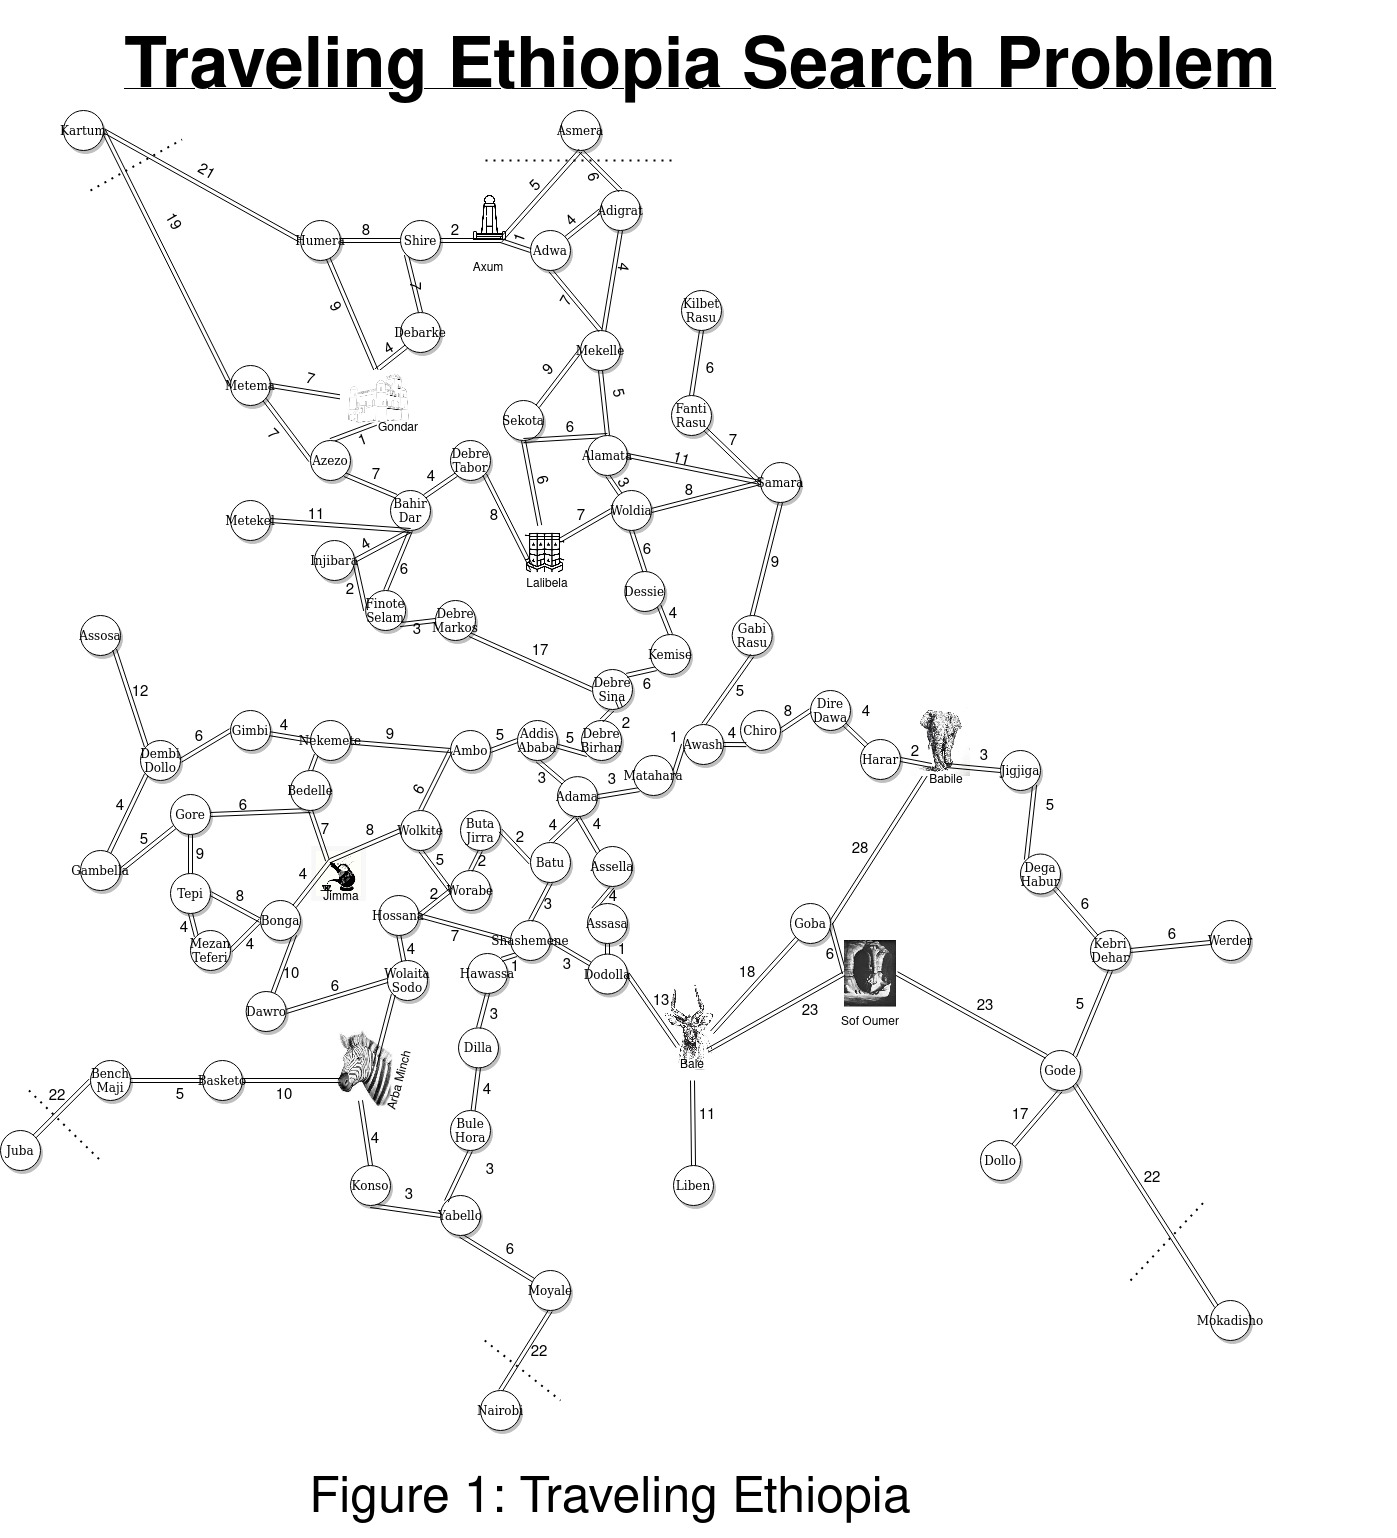

In [50]:
def route(previous, s):
    if s is None:
        return []
    else:
        return route(previous, previous[s]) + [s]

def route_cost(path, step_costs):
    cost = 0
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        cost += step_costs[current_node][next_node]
    return cost


In [51]:
ethiopia_cities = dict( {'Addis Ababa': {'Adama':3, 'Ambo':5, 'Debre Berhan':5},
             'Adama': {'Matahara':3, 'Asella':4, 'Batu':4, 'Addis Ababa':3}, 
             'Ambo': {'Wolkite':6, 'Addis Ababa':9, 'Nekemte':5}, 
             'Debre Berhan': {'Addis Ababa':5, 'Debre Sina':2}, 
             'Matahara': {'Adama':3, 'Awash':1}, 
             'Asella': {'Adama':4, 'Assasa':4}, 
             'Batu': {'Adama':4, 'Buta Jirra':2, 'Shashamene':3}, 
             'Wolkite': {'Ambo':6, 'Worabe':5, 'Jimma':8}, 
             'Nekemte': {'Ambo':9, 'Bedelle':5, 'Gimbi':4}, 
             'Debre Sina': {'Debre Berhan':2, 'Kemise':6, 'Debre Markos':17}, 
             'Awash': {'Chiro':4, 'Gobi Rasu':5, 'Matahara':1}, 
             'Assasa': {'Asella':4, 'Dodolla':1}, 
             'Buta Jirra': {'Batu':2, 'Worabe':2}, 
             'Shashamene': {'Batu':3, 'Hawassa':1, 'Dodolla':3, 'Hossana':7}, 
             'Worabe': {'Wolkite':5, 'Hossana':2, 'Buta Jirra':2}, 
             'Jimma': {'Wolkite':8, 'Bonga':4, 'Bedelle':7}, 
             'Bedelle': {'Nekemte':5, 'Gore':6, 'Jimma':7}, 
             'Gimbi': {'Nekemte':4, 'Dambidollo':6}, 
             'Kemise': {'Debre Sina':6, 'Dessie':4}, 
             'Debre Markos': {'Debre Sina':17, 'Finote Selam':3},
             'Chiro': {'Awash':4, 'Dire Dawa':8}, 
             'Gobi Rasu': {'Awash':5, 'Samara':9}, 
             'Dodolla': {'Assasa':1, 'Shashamene':3, 'Bale':13}, 
             'Hawassa': {'Shashamene':1, 'Dilla':3}, 
             'Hossana': {'Shashamene':7, 'Worabe':2, 'Wolaita Sodo':4}, 
             'Bonga': {'Jimma':4, 'Dawro':10, 'Tepi':8, 'Mizan Teferi':4}, 
             'Gore': {'Tepi':9, 'Gambella':5, 'Bedelle':6}, 
             'Dambidollo': {'Gimbi':6, 'Assosa':12, 'Gambella':4}, 
             'Dessie': {'Kemise':4, 'Woldia':6}, 
             'Finote Selam': {'Debre Markos':3, 'Bahirdar':6, 'Injibara':2}, 
             'Dire Dawa': { 'Chiro':8, 'Harar':4}, 
             'Samara': { 'Gobi Rasu':9, 'Fanti Rasu':7, 'Alamata':11, 'Woldia':8},
             'Bale': {'Liben':11, 'Dodolla':13, 'Goba':18, 'Sof Oumer':23}, 
             'Dilla': {'Hawassa':3, 'Bulehora':4}, 
             'Wolaita Sodo': {'Arba Minchi':5, 'Dawro':6, 'Hossana':4}, 
             'Dawro': { 'Bonga':10, 'Wolaita Sodo':10}, 
             'Tepi': {'Gore':9, 'Bonga':8, 'Mizan Teferi':4}, 
             'Mizan Teferi': {'Tepi':4, 'Bonga':4}, 
             'Gambella': {'Gore':5, 'Dambidollo':4}, 
             'Assosa': {'Dambidollo':12}, 
             'Woldia': {'Dessie':6, 'Lalibella':7, 'Samara':8, 'Alamata':3},
             'Bahirdar': {'Finote Selam':6, 'Injibara':4, 'Metekel':11, 'Azezo':7, 'Debre Tabor':4}, 
             'Injibara': {'Bahirdar':4, 'Finote Selam':2}, 
             'Harar': { 'Dire Dawa':4, 'Babile':2}, 
             'Fanti Rasu': {'Samara':7, 'Kilbet Rasu':6}, 
             'Alamata': {'Samara':11, 'Woldia':3, 'Mekelle':5, 'Sekota':6}, 
             'Liben': {'Bale':11}, 
             'Goba': {'Bale':18, 'Sof Oumer':6, 'Babile':28}, 
             'Sof Oumer': {'Goba':6, 'Bale':23, 'Gode':23}, 
             'Bulehora': { 'Dilla':4, 'Yabello':3}, 
             'Arba Minchi': {'Wolaita Sodo':5, 'Konso':4, 'Basketo':10}, 
             'Basketo': { 'Arba Minchi':10, 'Benchi Maji':5}, 
             'Metekel': { 'Bahirdar':11},
             'Lalibella': {'Woldia':7, 'Debre Tabor':8, 'Sekota':6},
             'Debre Tabor': {'Lalibella':8, 'Bahirdar':4}, 
             'Azezo': {'Gondar':1, 'Bahirdar':7, 'Metema':7}, 
             'Babile': { 'Harar':2, 'Jigjiga':3,'Goba':28}, 
             'Kilbet Rasu': {'Fanti Rasu':6}, 
             'Mekelle': {'Alamata':5, 'Adwa':7, 'Adigrat':4, 'Sekota':9}, 
             'Sekota': {'Alamata':6, 'Mekelle':9, 'Lalibella':6}, 
             'Dega Habur': {'Jigjiga':5, 'Kebri Dehar':6}, 
             'Kebri Dehar': {'Gode':5, 'Dega Habur':6, 'Werdez':6}, 
             'Yabello': { 'Bulehora':3, 'Konso':3, 'Moyale':6}, 
             'Konso': {'Arba Minchi':4, 'Yabello':3}, 
             'Benchi Maji': { 'Basketo':5}, 
             'Gondar': { 'Azezo':1, 'Humera':9, 'Metema':7, 'Debarke':4},
             'Metema': { 'Azezo':7, 'Gondar':7},  
             'Jigjiga': { 'Babile':3, 'Dega Habur':5}, 
             'Adwa': { 'Mekelle':7, 'Axum':1, 'Adigrat':4},
             'Adigrat': { 'Mekelle':4, 'Adwa':4}, 
             'Gode': { 'Dollo':17, 'Kebri Dehar':5, 'Sof Oumer':23 }, 
             'Werdez': { 'Kebri Dehar':6}, 
             'Moyale': { 'Yabello':6}, 
             'Debarke': { 'Gondar':4, 'Shire':7}, 
             'Axum': {'Shire':2, 'Adwa':1}, 
             'Dollo': { 'Gode':17}, 
             'Shire': { 'Axum':2, 'Humera':8, 'Debarke':7},
             'Humera': { 'Shire':8, 'Gondar':9}})

# 2.2 Assuming “Addis Ababa” as an initial state, write a program that use uniform cost search
to generate a path to “Lalibela”.


In [52]:
import heapq
class Frontier_PQ():
    def __init__(self, start, cost = 0):
        self.start = start
        self.cost = cost
        self.states = {start:cost} # the explored nodes
        self.q = [[cost, start]] # the can-be-explored nodes
    
    def add(self,state,cost):
        self.states[state]=cost
        heapq.heappush(self.q,[cost,state])
    
    def pop(self):
        return heapq.heappop(self.q)
    
    def replace(self,state,cost):
        self.states[state]=cost
        for i,tup in enumerate(self.q):
            if tup[1]==state:
                self.q[i][0]=cost

In [53]:
def uniform_cost_search(start, goal, state_graph, return_cost):
    frontier = Frontier_PQ(start)
    visited = set()
    prev = {start:None}
   
    while frontier.q:
        cost, curr = frontier.pop()
        if curr == goal:
            p = route(prev, curr)
            return (p, route_cost(p, state_graph)) if return_cost else p
        visited.add(curr)
       
        for adj in state_graph[curr]:
            if adj not in visited:
                if adj not in frontier.states:
                    prev[adj]=curr
                    frontier.add(adj,cost+state_graph[curr][adj])
                elif frontier.states[adj] > cost+state_graph[curr][adj]:
                    prev[adj]=curr
                    frontier.replace(adj,cost+state_graph[curr][adj])

In [54]:
print(uniform_cost_search("Addis Ababa", "Lalibella", ethiopia_cities , True))

(['Addis Ababa', 'Debre Berhan', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Lalibella'], 30)


In [55]:
def calc_uniform_cost_search(start,goals):
    goal_cost = dict()
    min_cost = float('inf')
    min_cost_city = None
    min_cost_path = None
    for goal in goals:  
#         print(start,goals)
        res = uniform_cost_search(start, goal, ethiopia_cities , True)
        path,cost = res
        goal_cost[goal] = cost
        if cost < min_cost: 
            min_cost = cost
            min_cost_city = goal
            min_cost_path = path
#     print(goal_cost)
    return min_cost_city,min_cost_path, min_cost

# 2.3 Given “Addis Ababa” as an initial state and “Axum”, “Gondar”, “Lalibela”, Babile,
“Jimma”, “Bale”, “Sof Oumer”, and “Arba Minch” as goal states;in no specific order, write
a customized uniform cost search algorithm to generate a path that let a visitor visit all those
goal states preserving the local optimum.

In [56]:
goals = ["Axum", "Gondar", "Lalibella", "Babile", "Jimma", "Bale", "Sof Oumer", "Arba Minchi"]
start = "Addis Ababa"
res = calc_uniform_cost_search(start,goals)
res

('Jimma', ['Addis Ababa', 'Ambo', 'Wolkite', 'Jimma'], 19)

In [57]:
goals = ["Axum", "Gondar", "Lalibella", "Babile", "Bale", "Sof Oumer", "Arba Minchi"]
start = "Jimma"
res = calc_uniform_cost_search(start,goals)
res

('Arba Minchi',
 ['Jimma', 'Wolkite', 'Worabe', 'Hossana', 'Wolaita Sodo', 'Arba Minchi'],
 24)

In [58]:
goals = ["Axum", "Gondar", "Lalibella", "Babile", "Bale", "Sof Oumer", "Arba Minchi"]
start = "Jimma"
res = calc_uniform_cost_search(start,goals)
res

('Arba Minchi',
 ['Jimma', 'Wolkite', 'Worabe', 'Hossana', 'Wolaita Sodo', 'Arba Minchi'],
 24)

In [59]:
goals = ["Axum", "Gondar", "Lalibella", "Babile", "Bale", "Sof Oumer"]
start = "Arba Minchi"
res = calc_uniform_cost_search(start,goals)
res

('Bale',
 ['Arba Minchi', 'Wolaita Sodo', 'Hossana', 'Shashamene', 'Dodolla', 'Bale'],
 32)

In [60]:
goals = ["Axum", "Gondar", "Lalibella", "Babile", "Sof Oumer"]
start = "Bale"
res = calc_uniform_cost_search(start,goals)
res

('Sof Oumer', ['Bale', 'Sof Oumer'], 23)

In [61]:
goals = ["Axum", "Gondar", "Lalibella", "Babile" ]
start = "Sof Oumer"
res = calc_uniform_cost_search(start,goals)
res

('Babile', ['Sof Oumer', 'Goba', 'Babile'], 34)

In [62]:
goals = ["Axum", "Gondar"]
start =  "Lalibella" 
res = calc_uniform_cost_search(start,goals)
res

('Gondar', ['Lalibella', 'Debre Tabor', 'Bahirdar', 'Azezo', 'Gondar'], 20)

In [63]:
goals = ["Axum"]
start =  "Gondar" 
res = calc_uniform_cost_search(start,goals)
res

('Axum', ['Gondar', 'Debarke', 'Shire', 'Axum'], 13)

# 3. Given Figure 3, a state space graph with heuristic and backward cost. Write a class that use A*
search to generate a path from the initial state “Addis Ababa” to goal state “Moyale”.

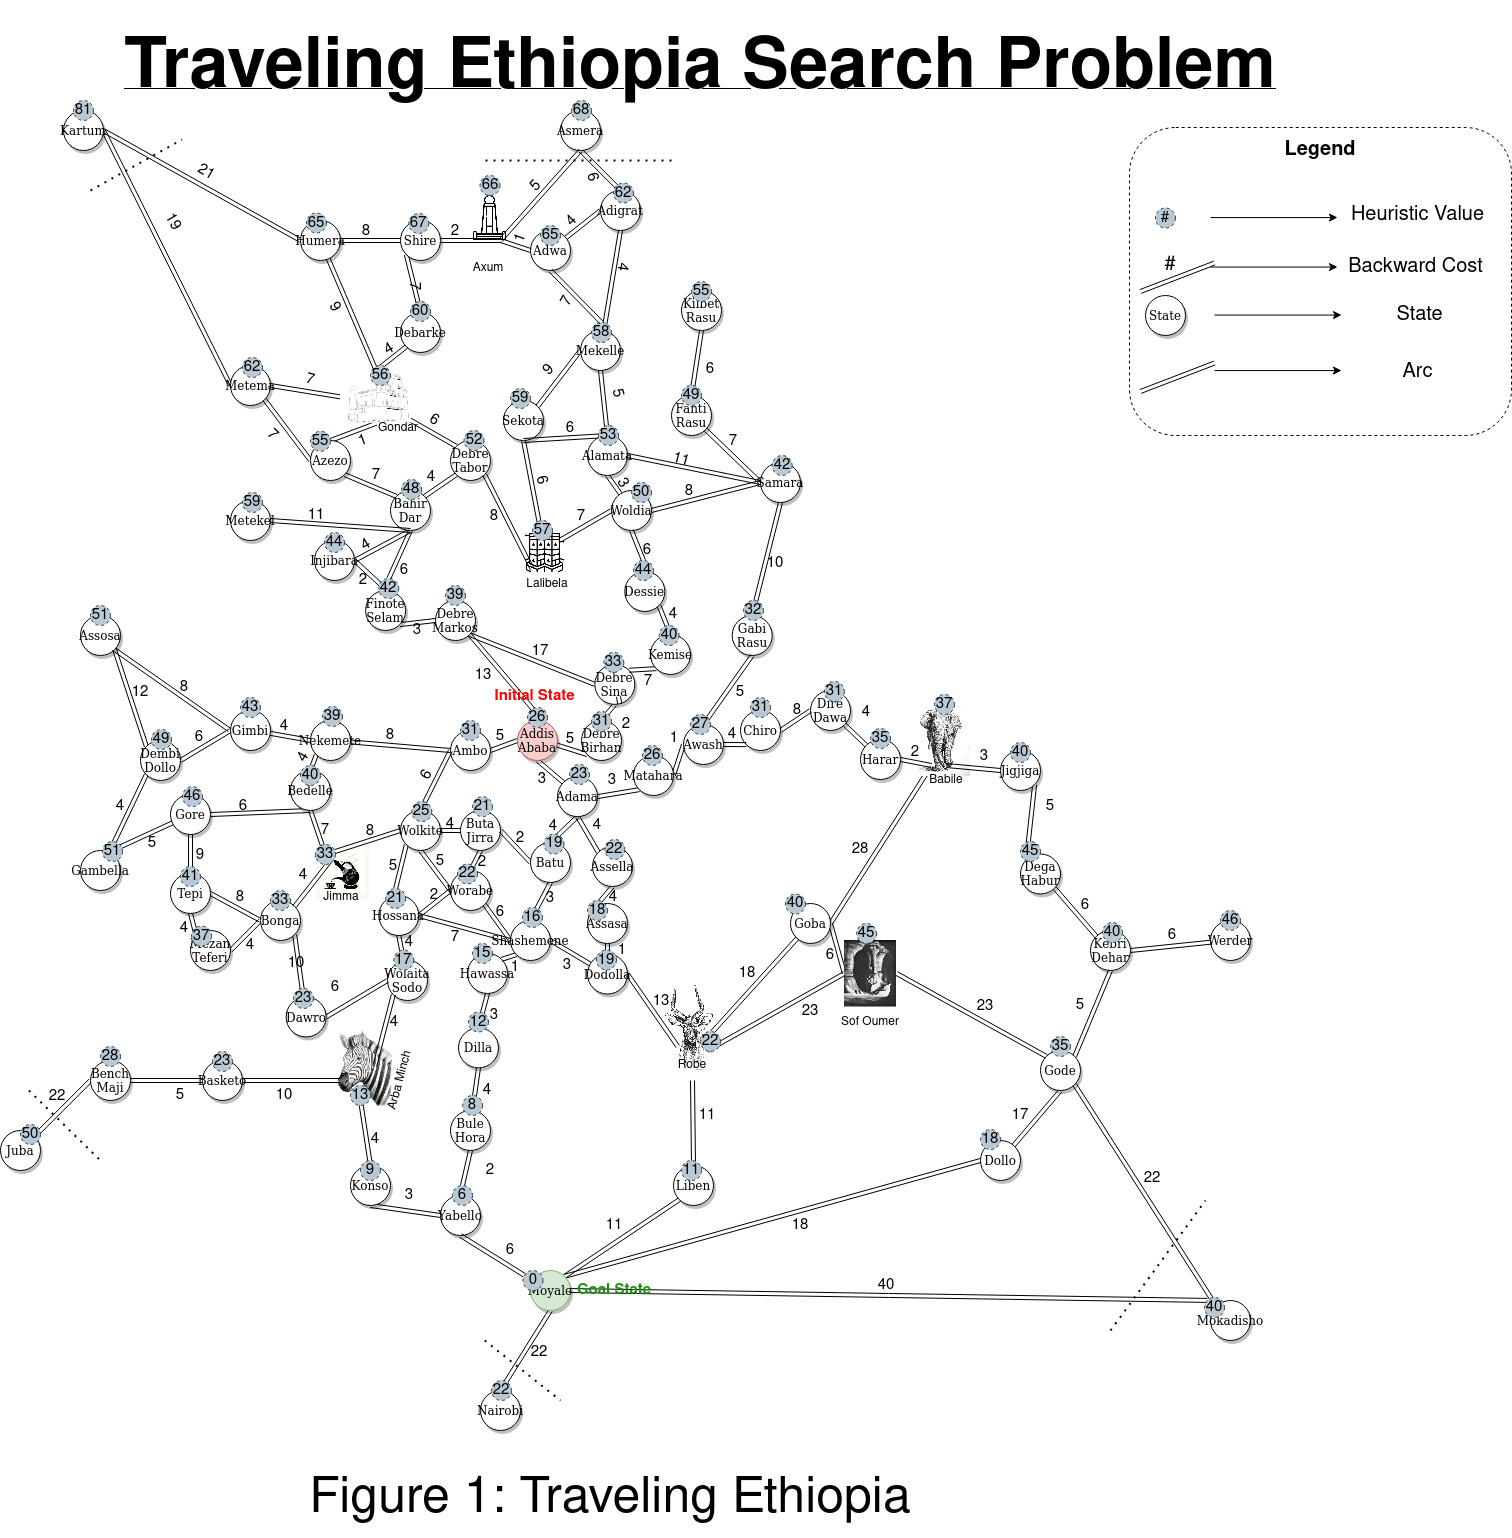

In [64]:
import numpy as np
from collections import deque
import heapq

In [65]:
def path(previous, s): 
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs[path[s]][path[s+1]]
    return cost

In [66]:
heuristic_ethiopia = dict( {'Addis Ababa': {'Adama':3, 'Ambo':5, 'Debre Berhan':5,'Debre Markos':13},
             'Adama': {'Matahara':3, 'Asella':4, 'Batu':4, 'Addis Ababa':3}, 
             'Ambo': {'Wolkite':6, 'Addis Ababa':5, 'Nekemte':8}, 
             'Debre Berhan': {'Addis Ababa':5, 'Debre Sina':2},
             'Debre Markos':{'Addis Ababa':13,'Debre Sina':17,'Finote Selam':3},             
             'Matahara': {'Adama':3, 'Awash':1}, 
             'Asella': {'Adama':4, 'Assasa':4}, 
             'Batu': {'Adama':4, 'Buta Jirra':2, 'Shashamene':3}, 
             'Wolkite': {'Ambo':6, 'Worabe':5, 'Jimma':8,'Hossana':5,'Buta Jirra':4}, 
             'Nekemte': {'Ambo':9, 'Bedelle':5, 'Gimbi':4}, 
             'Debre Sina': {'Debre Berhan':2, 'Kemise':7, 'Debre Markos':17}, 
             'Finote Selam': {'Debre Markos':3, 'Bahirdar':6, 'Injibara':2},               
             'Awash': {'Chiro':4, 'Gobi Rasu':5, 'Matahara':1}, 
             'Assasa': {'Asella':4, 'Dodolla':1}, 
             'Buta Jirra': {'Batu':2,'Wolkite':4, 'Worabe':2}, 
             'Shashamene': {'Batu':3,'Dodolla':3, 'Hawassa':1, 'Hossana':7,'Worabe':6}, 
             'Worabe': {'Wolkite':5, 'Hossana':2,'Shashamene':6, 'Buta Jirra':2}, 
             'Jimma': {'Wolkite':8, 'Bonga':4, 'Bedelle':7}, 
             'Hossana': {'Shashamene':7, 'Worabe':2, 'Wolkite':5, 'Wolaita Sodo':4}, 
             'Bedelle': {'Nekemte':5, 'Gore':6, 'Jimma':7}, 
             'Gimbi': {'Nekemte':4, 'Dambidollo':6,'Assosa':8}, 
             'Kemise': {'Debre Sina':6, 'Dessie':4}, 
             'Bahirdar': {'Finote Selam':6, 'Injibara':4, 'Metekel':11, 'Azezo':7, 'Debre Tabor':4},
             'Injibara': {'Bahirdar':4, 'Finote Selam':2},                 
             'Chiro': {'Awash':4, 'Dire Dawa':8}, 
             'Gobi Rasu': {'Awash':5, 'Samara':10}, 
             'Dodolla': {'Assasa':1, 'Shashamene':3, 'Robe':13}, 
             'Hawassa': {'Shashamene':1, 'Dilla':3}, 
             'Bonga': {'Jimma':4, 'Dawro':10, 'Tepi':8, 'Mizan Teferi':4}, 
             'Wolaita Sodo': {'Arba Minchi':4, 'Dawro':6, 'Hossana':4}, 
             'Gore': {'Tepi':9, 'Gambella':5, 'Bedelle':6}, 
             'Dambidollo': {'Gimbi':6, 'Assosa':12, 'Gambella':4}, 
             'Assosa': {'Gimbi':8, 'Dambidollo':12}, 
             'Dessie': {'Kemise':4, 'Woldia':6},
             'Metekel': { 'Bahirdar':11},
             'Azezo': {'Gondar':1, 'Bahirdar':7, 'Metema':7}, 
             'Debre Tabor': {'Lalibella':8, 'Gondar':6, 'Bahirdar':4},
             'Dire Dawa': { 'Chiro':8, 'Harar':4}, 
             'Samara': { 'Gobi Rasu':10, 'Fanti Rasu':7, 'Alamata':11, 'Woldia':8},
             'Robe': {'Liben':11, 'Dodolla':13, 'Goba':18, 'Sof Oumer':23}, 
             'Dilla': {'Hawassa':3, 'Bulehora':4}, 
             'Dawro': { 'Bonga':10, 'Wolaita Sodo':6}, 
             'Tepi': {'Gore':9, 'Bonga':8, 'Mizan Teferi':4}, 
             'Mizan Teferi': {'Tepi':4, 'Bonga':4}, 
             'Gambella': {'Gore':5, 'Dambidollo':4}, 
             'Arba Minchi': {'Wolaita Sodo':5, 'Konso':4, 'Basketo':10},
             'Woldia': {'Dessie':6, 'Lalibella':7, 'Samara':8, 'Alamata':3},
             'Gondar': { 'Azezo':1, 'Humera':9, 'Metema':7, 'Debarke':4,'Debre Tabor':6},
             'Metema': { 'Azezo':7, 'Gondar':7}, 
             'Lalibella': {'Woldia':7, 'Debre Tabor':8, 'Sekota':6},
             'Harar': { 'Dire Dawa':4, 'Babile':2}, 
             'Fanti Rasu': {'Samara':7, 'Kilbet Rasu':6}, 
             'Alamata': {'Samara':11, 'Woldia':3, 'Mekelle':5, 'Sekota':6}, 
             'Liben': {'Robe':11}, 
             'Goba': {'Robe':18, 'Sof Oumer':6, 'Babile':28}, 
             'Sof Oumer': {'Goba':6, 'Robe':23, 'Gode':23}, 
             'Bulehora': { 'Dilla':4, 'Yabello':3}, 
             'Konso': {'Arba Minchi':4, 'Yabello':3}, 
             'Basketo': { 'Arba Minchi':10, 'Bench Maji':5}, 
             'Humera': { 'Shire':8, 'Gondar':9},
             'Debarke': { 'Gondar':4, 'Shire':7},
             'Sekota': {'Alamata':6, 'Mekelle':9, 'Lalibella':6},              
             'Babile': { 'Harar':2, 'Jigjiga':3,'Goba':28}, 
             'Kilbet Rasu': {'Fanti Rasu':6}, 
             'Mekelle': {'Alamata':5, 'Adigrat':4, 'Adwa':7, 'Sekota':9},
             'Gode': { 'Dollo':17, 'Kebri Dehar':5, 'Sof Oumer':23 }, 
             'Yabello': { 'Bulehora':3, 'Konso':3, 'Moyale':6},
             'Bench Maji': { 'Basketo':5}, 
             'Shire': { 'Axum':2, 'Humera':8, 'Debarke':7},                              
             'Jigjiga': { 'Babile':3, 'Dega Habur':5}, 
             'Adigrat': { 'Mekelle':4, 'Adwa':4},
             'Adwa': { 'Mekelle':7, 'Axum':1, 'Adigrat':4},
             'Dollo':{'Gode':17,'Moyale':18},
             'Kebri Dehar': {'Gode':5, 'Dega Habur':6, 'Werdez':6}, 
             'Moyale': { 'Dollo':18,'Liben':11,'Yabello':6}, 
             'Axum': {'Shire':2, 'Adwa':1},
             'Dega Habur': {'Jigjiga':5, 'Kebri Dehar':6}, 
             'Werdez': { 'Kebri Dehar':6}
                      }
                    )

In [67]:
sld_Moyale=dict({
             'Addis Ababa':26,
             'Adama':23,
             'Ambo':31,
             'Debre Berhan':31,
             'Debre Markos':39,
             'Matahara':26,
             'Asella':22, 
             'Batu':19,  
             'Wolkite':25,  
             'Nekemte':39, 
             'Debre Sina':33,
             'Finote Selam':42,
             'Awash':27, 
             'Assasa':18, 
             'Buta Jirra':21, 
             'Shashamene':16, 
             'Worabe':22, 
             'Jimma':33,
             'Hossana':21,
             'Bedelle':40, 
             'Gimbi':43, 
             'Kemise':40,  
             'Bahirdar':48, 
             'Injibara':44,                               
             'Chiro':31,
             'Gobi Rasu':32, 
             'Dodolla':19,              
             'Hawassa':15,              
             'Bonga':33,
             'Wolaita Sodo':17, 
             'Gore':46,  
             'Dambidollo':49,
             'Assosa':51, 
             'Dessie':44, 
             'Metekel':59, 
             'Azezo':55, 
             'Debre Tabor':52,                          
             'Dire Dawa':31, 
             'Samara':42, 
             'Robe':13, 
             'Dilla':12, 
             'Dawro':23, 
             'Tepi':41,
             'Mizan Teferi':37, 
             'Arba Minchi':13, 
             'Gambella':51,               
             'Woldia':50,
             'Gondar':56, 
             'Metema':62, 
             'Lalibella':57,
             'Harar':35, 
             'Fanti Rasu':49, 
             'Alamata':53, 
             'Liben':11, 
             'Goba':40, 
             'Sof Oumer':45, 
             'Bulehora':8, 
             'Konso':9, 
             'Basketo':23,
             'Bench Maji':28,                
             'Humera':65, 
             'Debarke':60,
             'Sekota':59,             
             'Babile':37, 
             'Kilbet Rasu':55, 
             'Mekelle':58, 
             'Gode':35, 
             'Yabello':6, 
             'Shire':67,         
             'Adigrat':62,
             'Adwa':65, 
             'Dollo':18,
             'Kebri Dehar':40, 
             'Moyale':0,             
             'Axum':66,                                
             'Jigjiga':40,
             'Dega Habur':45,           
             'Kebri Dehar': 40,
             'Werdez':4
        }
        
       )

In [68]:
class Frontier_PQ():
    def __init__(self, start, cost = 0):
        self.start = start
        self.cost = cost
        self.states = {start:cost} # the explored nodes
        self.q = [[cost, start]] # the can-be-explored nodes
    
    def add(self,state,cost):
        self.states[state]=cost
        heapq.heappush(self.q,[cost,state])
    
    def pop(self):
        return heapq.heappop(self.q)
    
    def replace(self,state,cost):
        self.states[state]=cost
        for i,tup in enumerate(self.q):
            if tup[1]==state:
                self.q[i][0]=cost

In [69]:
def heuristic_sld_Moyale(state):
    return sld_Moyale[state]
print(heuristic_sld_Moyale("Moyale"))

0


In [70]:
def astar_search(start, goal, state_graph, heuristic, return_cost, return_nexp):
    frontier = Frontier_PQ(start)
    visited = set()
    prev = {start:None}
   
    while frontier.q:
        cost, curr = frontier.pop()
        visited.add(curr)
        if curr == goal:
            p = path(prev, curr)
            if return_nexp == False:
                return (p, pathcost(p, state_graph)) if return_cost else p
            else:
                return (p, pathcost(p, state_graph), len(visited)) if return_cost else (p,len(visited))
       
        for adj in state_graph[curr]:
            if adj not in visited:
                new_cost = cost + state_graph[curr][adj] + heuristic(adj) - heuristic(curr)
                if adj not in frontier.states:
                    prev[adj] = curr
                    frontier.add(adj, new_cost)
                elif frontier.states[adj] > new_cost:
                    prev[adj] = curr
                    frontier.replace(adj, new_cost)

In [71]:
ret = astar_search("Addis Ababa", "Moyale", heuristic_ethiopia, heuristic_sld_Moyale, True, True)
print("=======> A*:", ret[0])
print("=======> A* with Cost:", ret[1])

=======> A*: ['Addis Ababa', 'Adama', 'Batu', 'Shashamene', 'Hawassa', 'Dilla', 'Bulehora', 'Yabello', 'Moyale']
=======> A* with Cost: 27


# 4. Assume an adversary joins the Traveling Ethiopia Search Problem as shown in Figure 4. The goal
of the agent would be to reach to a state where it gains good quality of Coffee. Write a class that
shows how MiniMax search algorithm directs an agent to the best achievable destination.

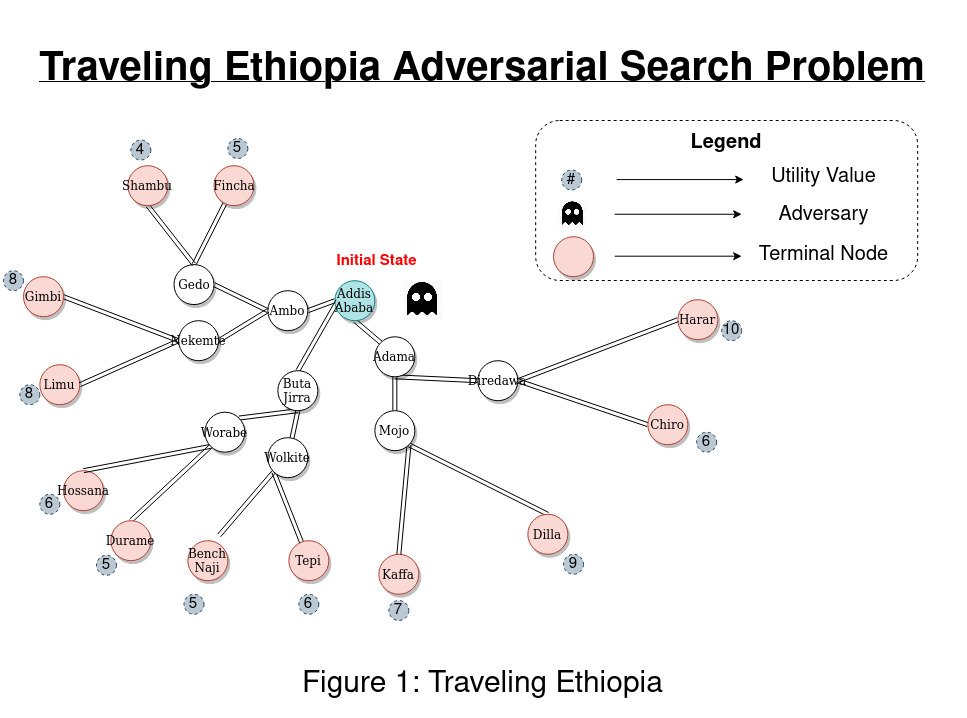

In [10]:
Adversarial_Search_ethiopia={
"Addis Ababa": {"Ambo","Buta Jirra", "Adama"},
"Ambo":{"Gedo", "Nekemte"},
"Buta Jirra":{"Worabe", "Wolkite"},
"Adama":{"Dire Dawa", "Mojo"},
"Gedo":{"Shambu","Fincha"},
"Nekemte":{"Gimbi", "Limu"},
"Worabe":{"Hosana","Durame"},
"Wolkite":{"Benchi Naji","Tepi"},
"Mojo":{"Dilla","Kaffa"},
"Dire Dawa":{"Chiro","Harar"}
}
goal_utilities = ["Shambu", "Fincha", "Gimbi", "Limu", "Hosana", "Durame", "Benchi Naji", "Tepi", "Kaffa", "Dilla", "Chiro", "Harar"]
terminals = [4, 5, 8, 8, 6, 5, 5, 6, 7, 9, 6, 10]

In [11]:
is_max = True
terminals_1 = []
choosen_cities =[]
for i in range(0,len(terminals),2): 
    if is_max:
        if terminals[i] > terminals[i+1]: 
            choosen_cities.append(goal_utilities[i])
        else: 
            choosen_cities.append(goal_utilities[i+1])
        terminals_1.append(max(terminals[i],terminals[i+1]))
graph = {
    "Fincha" : "Gedo", 
    "Limu" : "Nekemte", 
    "Hosana" : "Worabe", 
    "Tepi" : "Wolkite", 
    "Dilla" : "Mojo",
    "Harar":  "Dire Dawa"
}
is_max = False
choosen_cities_2 = [] 
terminals_2 = []

In [12]:
for i in range(0,len(terminals_1),2): 
    if not is_max:
        if terminals_1[i] > terminals_1[i+1]: 
            choosen_cities_2.append(graph[choosen_cities[i+1]])
        else: 
            choosen_cities_2.append(graph[choosen_cities[i]])
        terminals_2.append(min(terminals_1[i],terminals_1[i+1]))

graph_1={
"Gedo" : "Ambo",
"Worabe": "Buta Jirra",
"Mojo" : "Adama"}
max_city_ind = 0
if terminals_2[1] > terminals_2[max_city_ind]:
    max_city_ind = 1 
if terminals_2[2] > terminals_2[max_city_ind]:
    max_city_ind = 2

In [13]:
second_city = choosen_cities_2[max_city_ind]
first_choosen_city = graph_1[second_city]
print("Print Maxmimum")
print("Initail State: Addis Ababa")
print(first_choosen_city)
print(second_city)
third_city_options = Adversarial_Search_ethiopia[second_city]
third_city = None
for c in third_city_options: 
    if c in graph:
        third_city = c 
print("Goal State ==>",third_city)

Print Maxmimum
Initail State: Addis Ababa
Adama
Mojo
Goal State ==> Dilla
